# A Simple Decision Tree Example for Detecting Breast Cancer #
Author: Christin Seifert, licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/

This is a tutorial for learing and evaluating a simple decision tree on the famous breast cancer data set. In this notebook you will
* inspect the data you will be using to train the decision tree 
* train a decision tree 
* evaluate how well the decision tree does 
* visualize the decision tree

It is assumed that you have some general knowledge on 
* what a decision tree is and how it works
* how the Naive Bayes classifier works
* training and testing splits of data sets
* evaluation measures for classification (namely accuracy)

## Setup
First, we import all the python libraries we will need later

In [1]:
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# pretty printing
from pprint import pprint

# visualizing 
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Loading and inspecting the data set
The dataset comes with sklearn. So the only thing we have to do is to load it and see what's in there. 
The original version of the data set can be found at the
[UCI Machine learning Repository](https://bit.ly/1L1zT4y). Some more description can be found in the [Sklearn Documentation](http://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset).

We will have a look at 
* the 30 features 
* the names of the classes (spoiler, there are 2 of them)
* the size of the data set
* first example from the data set


In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# The shape of the data matrix (without class attribute)
print("Matrix shape: " + repr(data.data.shape))
# The names of the features
print("The data set has the following features:")
pprint(data.feature_names)
# The names of the classes
print("The data set has the following classes:")
pprint(data.target_names)

pprint(data.data[1])

# This prints a rather long descriptions.
#print(data.DESCR)

Matrix shape: (569, 30)
The data set has the following features:
array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')
The data set has the following classes:
array(['malignant', 'benign'], dtype='<U9')
array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308

## Preparing the data set for the classifier
There are 30 features. For the classifier we will only used the first 10 (those are the ones that contain the average values). 
We further need to keep some examples back that the classifier will not see during training in order to evaluate how well it does if it hasn't seen the examples before. Those will end up in our test split. The choice, whether one example is shown or not should be done randomly with `shuffle=True` (because we do not know whether the data set is somehow ordered).
The variables below mean the following:
* `X_train` - matrix with features for the training data 
* `X_test` - matrix with features for the testing data
* `y_train` - vector with the labels (true labels) for the training data set 
* `y_test` - vector with the labels (true labels) for the test data set


In [3]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target,shuffle=True,test_size=0.3, random_state=42)

## Training the classifier
Now we are ready to train the classifier. We first as for a on decision tree object that can do the training and then we tell it to train on the data we present. Note: At this point, the decision tree only sees `X_train` and `y_train`, so the features of the training data and the true labels of the training data.

In [4]:
# DECISION TREE
# initialize the model with standard parameters
clf_dt = DecisionTreeClassifier(criterion="entropy")
# train the model
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Making predictions for unseen data and evaluate how well it does
Now we have a trained decision tree. So what? Is this a good one? How does it look like?
To answer these questions we first let it make predictions on the test data set `X_test` (we know the true labels, but we won't tell them to the decision tree). And then we compare the labels the tree predicted `y_test_pred` with the true labels `y_test`. And we count how often they agree, which gives us the accuracy of the decision tree. We do the same for the training data (let it predict the training data and compare with the true labels). 

In [5]:
# Evaluating on the test data
y_test_pred = clf_dt.predict(X_test);
a_dt_test = accuracy_score(y_test, y_test_pred);

# Evaluating on the training data
y_train_pred = clf_dt.predict(X_train);
a_dt_train = accuracy_score(y_train, y_train_pred);

print("Training data accuracy is " +  repr(a_dt_train) + " and test data accuracy is " + repr(a_dt_test))

Training data accuracy is 1.0 and test data accuracy is 0.9707602339181286


We see that the decision tree classifies the training data perfectly, and the test data quite good. The difference in training and test accuracy is an indication for overfitting, which is bad. So we might decide to try different parameters for the decision tree learner (we are not going to do this in this notebook):

## Visualizing the tree
We now have an idea how well the model does, but we actually don't know WHAT it does. The nice thing about decision trees is that you can visualize the model to understand what it bases its decisions on.

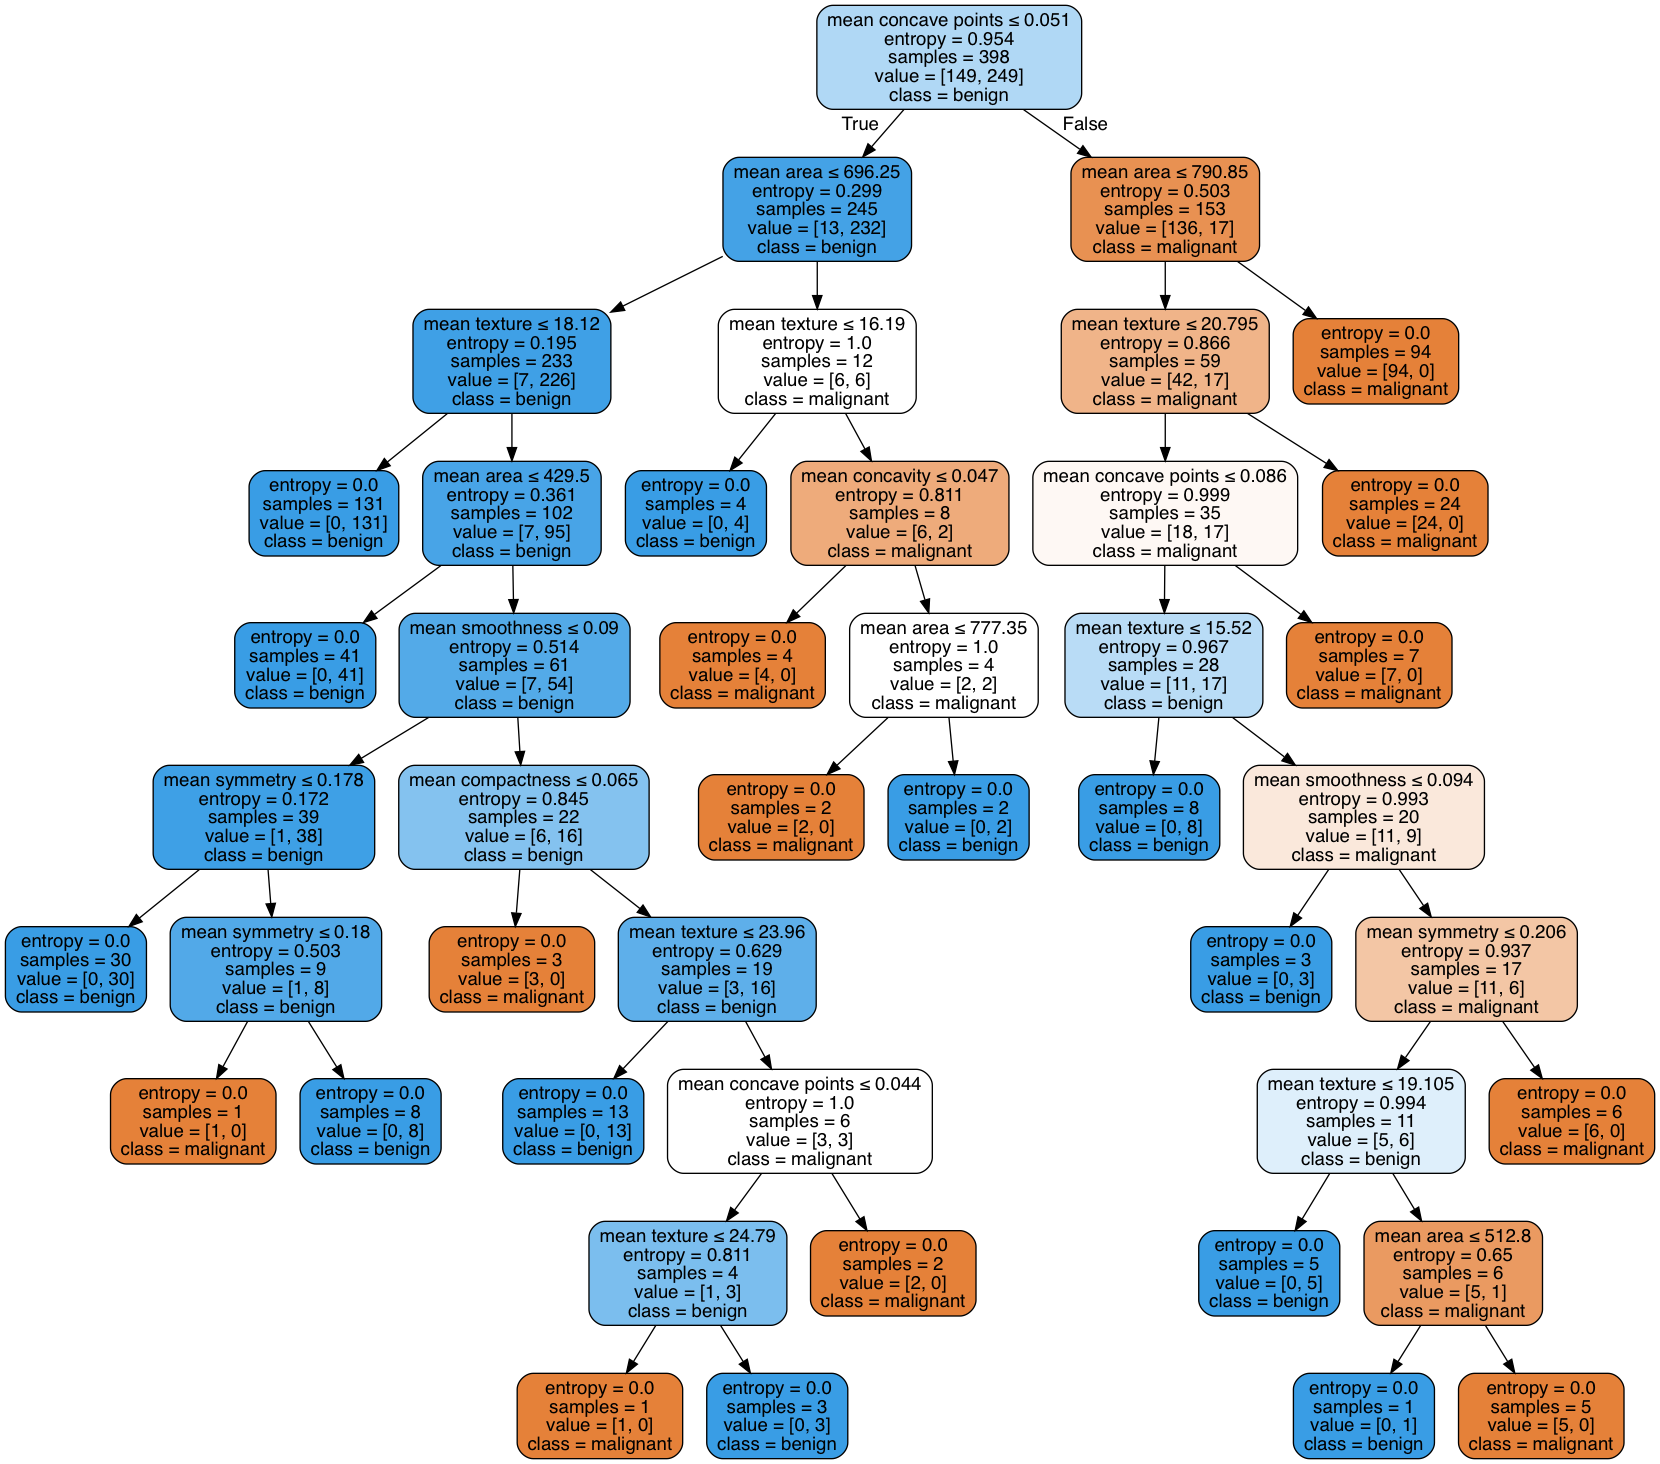

In [7]:
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,
                feature_names=data.feature_names[0:9],  
                class_names=data.target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

That's all for today. 